In [2]:
#Import basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [3]:
# System specs:
import sys
print('sys_Version:',sys.version)
print('scikit-learn:',sklearn.__version__)  


sys_Version: 3.13.1 (tags/v3.13.1:0671451, Dec  3 2024, 19:06:28) [MSC v.1942 64 bit (AMD64)]
scikit-learn: 1.6.1


In [4]:
# Setting up default settings for plots, rc = Runtime configuration

plt.rc('figure',figsize = (10,6))          
plt.rc('font',size =14)                    # Defining font size for all texts (unless overriden)
plt.rc('xtick', labelsize = 14)            # you know what tick and tick_label is right?
plt.rc('ytick', labelsize = 14)
plt.rc('axes',labelsize= 14, titlesize= 16, titleweight = 'bold')   # Defining config of Xaxis, Yaxis and title

In [5]:
# Creating a function to save plots directly (Not really necessary cuz we wont post it on any book)
from pathlib import Path

Image_path = Path() / 'images'     #Creating path for images to be stored 
Image_path.mkdir(exist_ok=True)    #Making directory of images (exists_ok = True won't raise error if not)

def save_img(fig_name,tight_layout=True, resolution=300, extension='png'):

    image_path = Image_path / f'{fig_name}.{extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(image_path, format=extension, dpi= resolution)


# Now We just have to call this function and the plot will be saved

### _Loading the dataset_
MNIST dataset: a famous dataset ('hellow world' of classfication problems)  
MNIST = Modified National Institute of Standards and Technology  

This data contains numbers (0-9) and we have to classify them

In [6]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',version=1)

This data MNIST is structured as dict that have data stored as keys and values

In [7]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [8]:
print(mnist['DESCR'])

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In Summary:  
- This is a sudbset of larger data from NSIT.
- Each digit is of size 20x20 pixels fitted into an image of 28x28 pixels
- Due to Normalization and anti-aliasing the images contain gray level, originally they were pure black and white
- data contains 70000 instances - 60000 for training and 10000 for test 

In [9]:
mnist['data']   # That implements, data have 70000 images, and 28x28=784 pixels i.e Features

#each feature simply represents one pixel’s intensity, from 0(white) to 255 (black)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
mnist['target']      # i.e the final value we need to predict (basically label) 

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [11]:
## Defining data and label
X,y = mnist['data'], mnist['target']

In [12]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


But to display images we use 'imshow'... the problem is that imshow only takes an array not df

In [13]:
X,y=np.array(X),np.array(y)

In [14]:
## We still cant display image directly cuz the array for each image is of size 784
X[0].shape #should be 28x28

(784,)

'5'

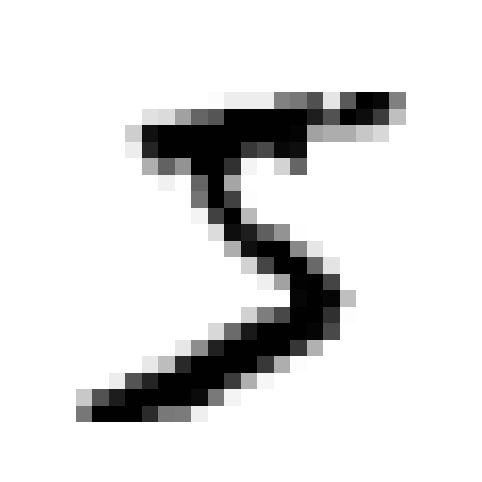

In [15]:
## Create function to display images

def plot_image(image_data):
    image_data = image_data.reshape(28,28)
    plt.imshow(image_data, cmap='binary')     # cmap=binary -> black and white (original), otherwise imshow give diff color intensities itself
    plt.axis('off')                           #Turn of axis (x_axis,y_axis)        

plot_image(X[0])
y[0]   #Original data point is '5'

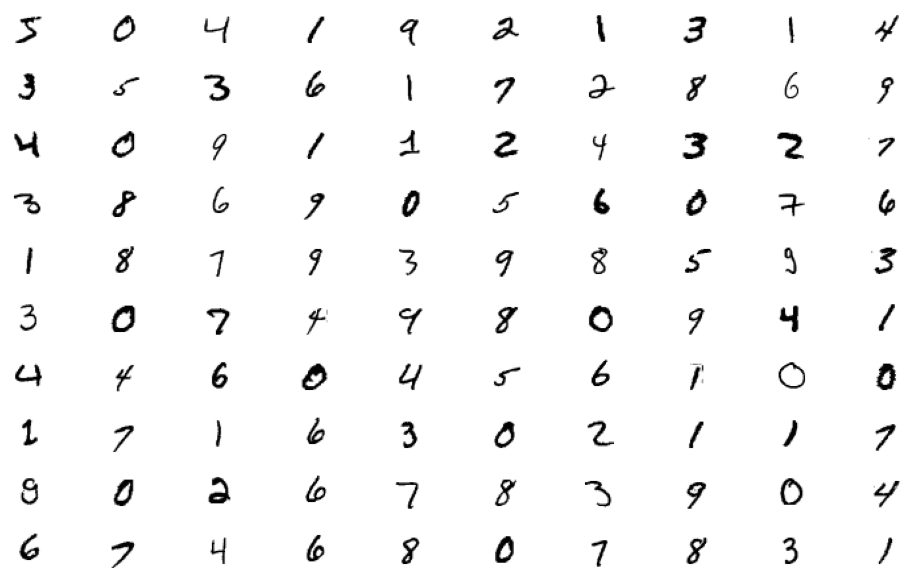

In [16]:
## Displaying some data points

for indx,image in enumerate(X[:100]):
    plt.subplot(10,10,indx+1)
    plot_image(image)

#You can save this by
save_img('digit_plots')

## Train-Test split
The dataset is designed such that first 60000 images to be used for training and rest 10000 for test

In [17]:
# In general we do this
from sklearn.model_selection import train_test_split

X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.2,random_state=42)

But in this dataset, we are already told what is training and testing data
- Initial 60000 samples is training data and remaining 10000 samples are Testing data

In [18]:
X_Train,X_Test,y_Train,y_Test = X[:60000],X[60000:],y[:60000],y[60000:]

for i in [X_Train,X_Test,y_Train,y_Test]:
    print(i.shape)


(60000, 784)
(10000, 784)
(60000,)
(10000,)


### ___Training Binary Classification___
Starting with just a simple binary classification....  
Predicting if any digit is 5 or not-5

In [19]:
from sklearn.linear_model import SGDClassifier

___About SGD classifier___:  
SGD --> Stochastic Gradient Descent  
'Stochastic' means random and 'Gradient Descent' is an optimization algorithm(will study later) to find best parameters  

- It handles large datasets efficiently
- It rather than training all the data at once, this model randomly picks one sample at a time and update the model according to it
- Hence, its good choice for online learning 

In [20]:
sgd_classifier = SGDClassifier(random_state=42)   #Since it relies on randomness, we have to fix a random state for reproducible results

In [21]:
y_train_5 = (y_Train=='5')    #Define lables   (Note that the labels arenot 'int' they are 'str') 
y_test_5 = (y_Test=='5')

sgd_classifier.fit(X_Train,y_train_5)

SGDClassifier(random_state=42)

In [22]:
some_data = X_Train[:13] 
sgd_classifier.predict(some_data)

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True, False])

## _Performance measures_
(for Classification problems)

#### Creating our own performance measure 
(That does the same work as K-fold cross validation for now)  
Making it ourself, Sometimes better control over performance measure is needed

#### __Implementing Cross Validation__
- K-Fold Cross Validation: The dataset is split into k equal parts (folds); in each of k iterations, one fold serves as the validation set (roughly 1/k of the data) while the remaining k–1 folds are used for training, and the results are averaged to evaluate model performance.

In [23]:
from sklearn.model_selection import StratifiedKFold    #To divide data into k-folds in stratified way i.e keeping same number of samples from each class in every fold
from sklearn.base import clone       #To get copy of untrained estimator for each fold

#Create instance of StratifiedKFold with 3 splits (3 folds, i.e for each iteration 2 folds will be used for training and 1 for testing)
strat_kfolds = StratifiedKFold(n_splits=3)


for train_index,test_index in strat_kfolds.split(X_Train,y_train_5):    #strat_kfolds.split generate pair indices of each fold(train+test)
    clone_sgd = clone(sgd_classifier)

    X_train = X_Train[train_index]
    y_train = y_train_5[train_index]

    X_test = X_Train[test_index]
    y_test = y_train_5[test_index]

    clone_sgd.fit(X_train,y_train)
    prediction = clone_sgd.predict(X_test)

    Total_correct_prediction = sum(prediction==y_test)

    print(Total_correct_prediction/len(X_test)) 

0.95035
0.96035
0.9604


In [24]:
## Doing the same with cross_val_score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    estimator=sgd_classifier,
    X=X_Train,
    y=y_train_5,
    cv=3,
    scoring='accuracy'
)

In [25]:
print('scores',scores)
print('Avg score',scores.mean())

scores [0.95035 0.96035 0.9604 ]
Avg score 0.9570333333333334


95% accuracyyyy!!

But before getting excited, look at this estimator

In [26]:
from sklearn.base import BaseEstimator

class Never5classifier(BaseEstimator):
    def fit(self,X,y):              #Dont train anything
        return self
    
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
    

# This predict function return an array of zeroes    

This Never5classifier is a predictor that doesnt predict anything  
it just return a matrix of zeroes.....  
what should be its accuracy?

In [27]:
not_5_classifier = Never5classifier()
scores = cross_val_score(not_5_classifier,X_Train,y_train_5,scoring='accuracy',cv=3)

In [28]:
print("scores:", scores)
print("avg_score:",scores.mean())

scores: [0.91125 0.90855 0.90915]
avg_score: 0.90965


90% accuracy lmao!!  
why?  
Because 90% of the images are not-5 and only 10% images are 5. i.e The data is skewed (one class is more frequent than other).  
Thats why, no matter what the model predicts it has 90% chance of not being 5.

__Thats why, `accuracy` is not a preferred performance measure__ (especially for skewed datasets)

### __Confusion matrix__

In confusion matrix we count the number of instances when model classified class A as class B.

To get confusion matrix we, need predictions to compare them with actual label

In [29]:
from sklearn.model_selection import cross_val_predict

y_train_predictions = cross_val_predict(sgd_classifier,X_Train,y_train_5,cv=3)

Using `cross_val_predict`, It works just like cross_val_score but rather than returning scores, it returns actual predicted values of each instance in each fold

In [30]:
y_train_predictions

array([ True, False, False, ...,  True, False, False], shape=(60000,))

But why didn't we use acutal predictions predicted using sgd_classifier.predict()?  
This is because we need `clean prediction` for confusion matrix to get best perfomance measure.

clean prediction? cross_val_predict divides dataset into folds, train model using diff folds and test on diff fold that it has never seen before - clean prediction  (The one we do with test set, stored to be used at last)   

while, sgd_classifier, which is trained on whole dataset (including the instances we gonna predict). sgd_classifier.predict() does not give clean prediction

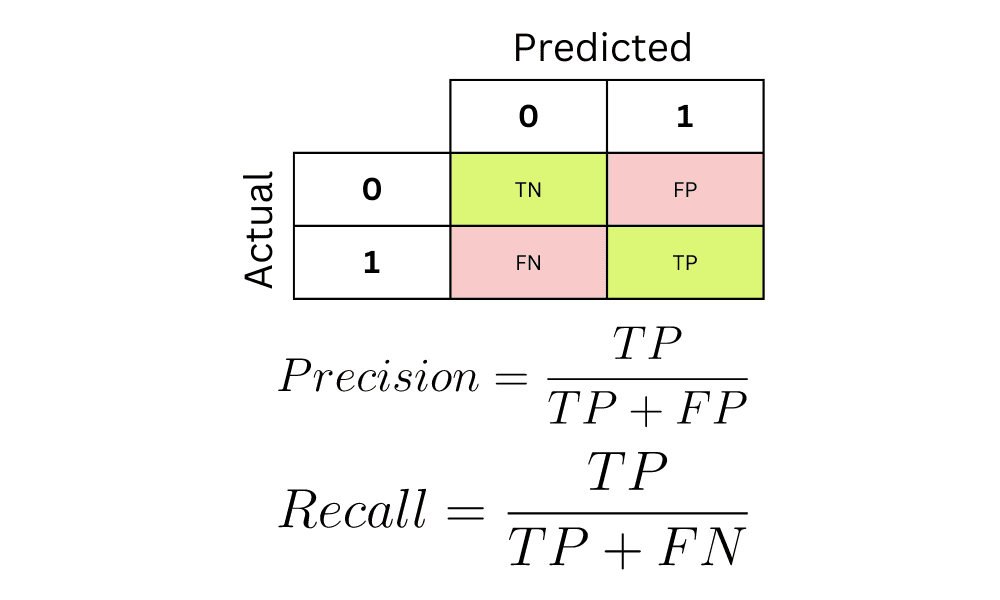

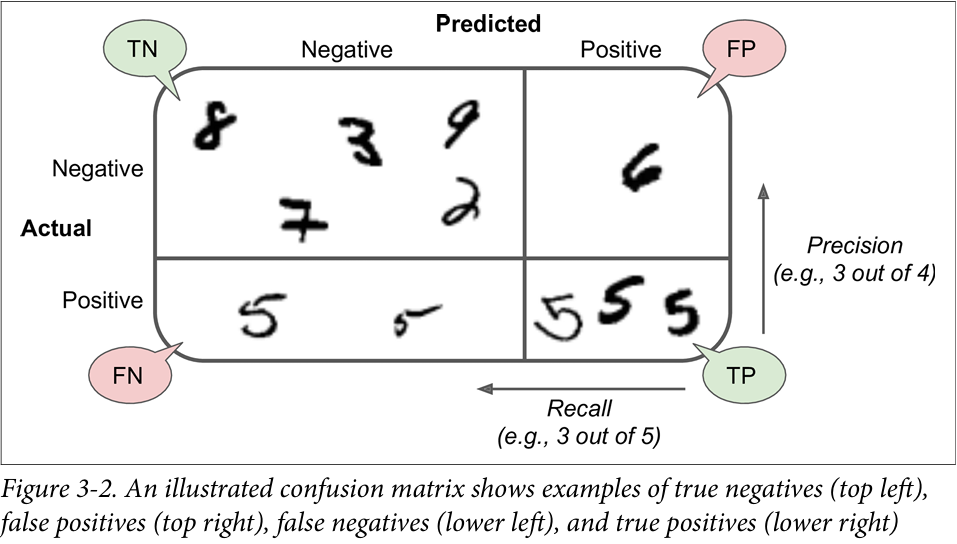

In [31]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_predictions)

array([[53892,   687],
       [ 1891,  3530]])

53892 -> True negatives (i.e not-5 and predicted not-5)  
687 -> False negatives (i.e not-5 and predicted 5)

1891 -> False positive (i.e 5 and predicted not-5)  
3530 -> True positive (i.e 5 and predicted 5)

In [32]:
# If model was 100% perfect
y_train_predictions = y_train_5

confusion_matrix(y_train_5,y_train_predictions)

array([[54579,     0],
       [    0,  5421]])

`Accuracy`, `Precision`, `Recall`

- Accuracy : ratio of total true predictions wrt total number of predictions.  
'out of all predictions, how many did we got right?'  
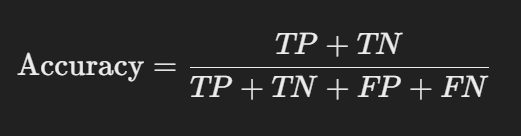


- Precision : ratio of true positive predictions wrt total true predictions.  
'out of all positive predictions, how many did we got right?'  
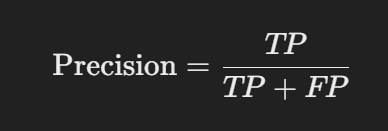


- Recall : (also called 'Senstivity','True positive rate (TPR)')  
Ratio of true positive predictions wrt total positive   
'out of all predictions, how many positive predictions we got right?'
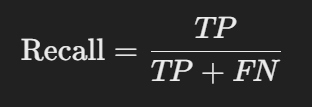

In [34]:
from sklearn.model_selection import cross_val_predict

y_train_predictions = cross_val_predict(sgd_classifier,X_Train,y_train_5,cv=3)

In [ ]:
from sklearn.metrics import precision_score,recall_score

## Precision metric
precision = precision_score(y_train_5,y_train_predictions)
print("Precision",precision)

## Recall metric
recall = recall_score(y_train_5,y_train_predictions)
print("Recall",recall)

Precision 0.8370879772350012
Recall 0.6511713705958311


83% precision and 65% recall is not that good right?
while the accuracy was 95% that was because, the prediction of negative (not-5) values were mostly correct (cuz we have 90% chance of it being correct (data is skewed)).

In [41]:
# Doing the same with formula

con_matx = confusion_matrix(y_train_5,y_train_predictions)
cm_precision = con_matx[1,1]/(con_matx[0,1]+con_matx[1,1])
print("Precision",cm_precision)

cm_recall = con_matx[1,1]/(con_matx[1,0]+con_matx[1,1])
print("Recall",cm_recall)

Precision 0.8370879772350012
Recall 0.6511713705958311


`Interpretation`  
- When the model predicts that an image is a '5', it's correct about 83.7% of the time   
- Out of all actual '5's in the dataset, the model successfully detects 65.1% of them

But sometimes we only want a single metric to summarize the performance  

#### _F1 metric_ : 
F1 score is harmonic mean of precision and recall.  
why harmonic mean and not arithmetic mean? because: HM gives more weight to lower values, hence, to get a high F1 score, our model must have high precision and recall both!

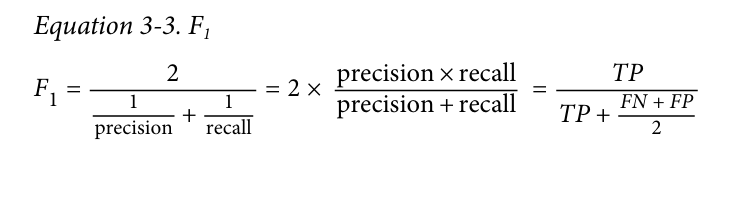

In [42]:
from sklearn.metrics import f1_score

f1 = f1_score(y_train_5,y_train_predictions)
f1

0.7325171197343847

F1-score is useful when you want a balance between precision and recall, but sometimes, one is more important than the other.

Example 1 (High Precision Needed):

Kid-friendly video classifier: Better to reject many safe videos (low recall) than allow unsafe ones (high precision).

A human review pipeline can help refine the selection.

Example 2 (High Recall Needed):

Shoplifter detection: It's okay to flag some innocent people (low precision) as long as most actual shoplifters are caught (high recall).

`Precision/Recall Trade-off`: You can’t increase both precision and recall at the same time—improving one usually reduces the other.